## Data Preprocessing and Feature Extraction

### Subtask:
Implement text cleaning steps (lowercase conversion, punctuation removal, number removal) and describe the chosen feature representation for the model. This step will also include loading the 'email.csv' dataset.


In [1]:
import pandas as pd

# Load the email.csv dataset
df = pd.read_csv('/content/email.csv')

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

# Display information about the DataFrame to check column names and data types
print('\nDataFrame Info:')
df.info()

First 5 rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Reasoning**:
Now that the dataset is loaded, I will define a text preprocessing function as instructed. This function will convert text to lowercase, remove punctuation, and remove numbers. Then, I'll apply this function to the 'Message' column of the DataFrame to clean the text data.



In [2]:
import string

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = text.translate(str.maketrans('', '', string.digits))
    return text

# Apply the preprocessing function to the 'Message' column
df['clean_message'] = df['Message'].apply(preprocess_text)

# Display the first few rows with the new cleaned column
print('First 5 rows of the dataset with clean_message:')
print(df[['Message', 'clean_message']].head())

First 5 rows of the dataset with clean_message:
                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


**Reasoning**:
Following the instructions, I will now split the preprocessed data into training and testing sets. This involves separating the cleaned 'clean_message' column as features (X) and the 'Category' column as the target variable (y). Then, I'll use `train_test_split` to create the training and testing datasets.



In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df['clean_message']
y = df['Category']

# Split the data into training and testing sets
# Using a common split ratio of 80% for training and 20% for testing, with a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4458,)
Shape of X_test: (1115,)
Shape of y_train: (4458,)
Shape of y_test: (1115,)


**Reasoning**:
Now that the data has been preprocessed and split, I will convert the text data into numerical features using `CountVectorizer`. This will transform the text messages into a matrix of token counts, which is a common and suitable representation for machine learning models in natural language processing. I'll fit the vectorizer on the training data (`X_train`) and then transform both training and testing data.



In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
# Using default parameters will create a vocabulary of all unique words and count their occurrences.
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_counts = vectorizer.transform(X_test)

print(f"Shape of X_train_counts: {X_train_counts.shape}")
print(f"Shape of X_test_counts: {X_test_counts.shape}")
print(f"Number of unique words (features): {len(vectorizer.get_feature_names_out())}")

Shape of X_train_counts: (4458, 7622)
Shape of X_test_counts: (1115, 7622)
Number of unique words (features): 7622


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support

# 3. Initialize the MultinomialNB classifier (Laplace smoothing is default with alpha=1.0)
model = MultinomialNB()

# 4. Train the Naive Bayes model
model.fit(X_train_counts, y_train)

# 5. Make predictions on the test data
y_pred = model.predict(X_test_counts)

# 6. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# Get class labels from the model
class_labels = model.classes_

# Calculate precision, recall, and f1-score for each class
# using average=None to get individual scores for each label
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=class_labels)

# Find the index of the 'spam' class to extract its scores
spam_index = list(class_labels).index('spam')

precision = precision_per_class[spam_index]
recall = recall_per_class[spam_index]
f1 = f1_per_class[spam_index]

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (spam): {precision:.4f}")
print(f"Recall (spam): {recall:.4f}")
print(f"F1-Score (spam): {f1:.4f}")

# 7. Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Generate and print a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 9. Demonstrate log-likelihood calculation for the first 5 test samples
print("\nLog probabilities for the first 5 test samples (log-likelihood of each class):")
# MultinomialNB's predict_log_proba returns log-probabilities for each class
# The order of classes can be found with model.classes_
log_proba_samples = model.predict_log_proba(X_test_counts[:5])
for i, sample_log_proba in enumerate(log_proba_samples):
    print(f"Sample {i+1}:")
    for j, class_name in enumerate(model.classes_):
        print(f"  Log P({class_name}): {sample_log_proba[j]:.4f}")


Accuracy: 0.9839
Precision (spam): 0.9795
Recall (spam): 0.9108
F1-Score (spam): 0.9439

Classification Report:
                precision    recall  f1-score   support

           ham       0.99      1.00      0.99       958
          spam       0.98      0.91      0.94       157
{"mode":"full"       0.00      0.00      0.00         0

      accuracy                           0.98      1115
     macro avg       0.65      0.64      0.64      1115
  weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[954   3   1]
 [ 14 143   0]
 [  0   0   0]]

Log probabilities for the first 5 test samples (log-likelihood of each class):
Sample 1:
  Log P(ham): -0.0001
  Log P(spam): -9.5042
  Log P({"mode":"full"): -19.8432
Sample 2:
  Log P(ham): -0.0000
  Log P(spam): -25.0063
  Log P({"mode":"full"): -46.1945
Sample 3:
  Log P(ham): -0.0002
  Log P(spam): -8.3352
  Log P({"mode":"full"): -21.2591
Sample 4:
  Log P(ham): -0.0000
  Log P(spam): -26.2825
  Log P({"mode":"full")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

**Reasoning**:
The previous code produced `UndefinedMetricWarning` and an unexpected label `{"mode":"full"` in the `class_labels` and `y` variable. This indicates an issue with the `Category` column having an unintended value. I will filter the DataFrame to remove rows where the `Category` is `{"mode":"full"`, ensuring that only valid 'ham' or 'spam' labels are present. This should be done before splitting the data into training and testing sets.



In [8]:
import pandas as pd

# Filter out the rows where 'Category' is '{"mode":"full"'
df = df[df['Category'].isin(['ham', 'spam'])]

# Display the unique categories to confirm cleaning
print("Unique categories after cleaning:", df['Category'].unique())

# Display the first few rows of the DataFrame after cleaning
print('\nFirst 5 rows of the dataset after category cleaning:')
print(df.head())

Unique categories after cleaning: ['ham' 'spam']

First 5 rows of the dataset after category cleaning:
  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes to usf he lives aroun...  


**Reasoning**:
Now that the `df` has been cleaned by removing the erroneous category, I need to re-split the data into training and testing sets. This ensures that `X`, `y`, `X_train`, `X_test`, `y_train`, and `y_test` reflect the corrected dataset before proceeding with model training and evaluation.



In [9]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df['clean_message']
y = df['Category']

# Split the data into training and testing sets
# Using a common split ratio of 80% for training and 20% for testing, with a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4457,)
Shape of X_test: (1115,)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_counts = vectorizer.transform(X_test)

print(f"Shape of X_train_counts: {X_train_counts.shape}")
print(f"Shape of X_test_counts: {X_test_counts.shape}")
print(f"Number of unique words (features): {len(vectorizer.get_feature_names_out())}")

Shape of X_train_counts: (4457, 7582)
Shape of X_test_counts: (1115, 7582)
Number of unique words (features): 7582


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support

# 3. Initialize the MultinomialNB classifier (Laplace smoothing is default with alpha=1.0)
model = MultinomialNB()

# 4. Train the Naive Bayes model
model.fit(X_train_counts, y_train)

# 5. Make predictions on the test data
y_pred = model.predict(X_test_counts)

# 6. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# Get class labels from the model
class_labels = model.classes_

# Calculate precision, recall, and f1-score for each class
# using average=None to get individual scores for each label
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=class_labels)

# Find the index of the 'spam' class to extract its scores
spam_index = list(class_labels).index('spam')

precision = precision_per_class[spam_index]
recall = recall_per_class[spam_index]
f1 = f1_per_class[spam_index]

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (spam): {precision:.4f}")
print(f"Recall (spam): {recall:.4f}")
print(f"F1-Score (spam): {f1:.4f}")

# 7. Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Generate and print a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 9. Demonstrate log-likelihood calculation for the first 5 test samples
print("\nLog probabilities for the first 5 test samples (log-likelihood of each class):")
# MultinomialNB's predict_log_proba returns log-probabilities for each class
# The order of classes can be found with model.classes_
log_proba_samples = model.predict_log_proba(X_test_counts[:5])
for i, sample_log_proba in enumerate(log_proba_samples):
    print(f"Sample {i+1}:")
    for j, class_name in enumerate(model.classes_):
        print(f"  Log P({class_name}): {sample_log_proba[j]:.4f}")


Accuracy: 0.9883
Precision (spam): 1.0000
Recall (spam): 0.9128
F1-Score (spam): 0.9544

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
[[966   0]
 [ 13 136]]

Log probabilities for the first 5 test samples (log-likelihood of each class):
Sample 1:
  Log P(ham): -0.0000
  Log P(spam): -17.4063
Sample 2:
  Log P(ham): -0.0000
  Log P(spam): -20.1256
Sample 3:
  Log P(ham): -0.0000
  Log P(spam): -23.1891
Sample 4:
  Log P(ham): -0.0000
  Log P(spam): -14.8810
Sample 5:
  Log P(ham): -0.0000
  Log P(spam): -10.6378


## Implement TF-IDF Vectorization and Model Re-evaluation

### Subtask:
Transform the text data using TF-IDF vectorization. Train a new Multinomial Naive Bayes model on these TF-IDF features, and then evaluate its performance using accuracy, precision, recall, and F1-score. Compare these results with the previous CountVectorizer-based model to discuss the impact of TF-IDF.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")
print(f"Number of unique words (features) with TF-IDF: {len(tfidf_vectorizer.get_feature_names_out())}")

Shape of X_train_tfidf: (4457, 7582)
Shape of X_test_tfidf: (1115, 7582)
Number of unique words (features) with TF-IDF: 7582


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Initialize a new MultinomialNB classifier (Laplace smoothing is default with alpha=1.0)
model_tfidf = MultinomialNB()

# Train the Naive Bayes model using TF-IDF features
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF transformed test data
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Calculate and print evaluation metrics
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Get class labels from the model
class_labels_tfidf = model_tfidf.classes_

# Calculate precision, recall, and f1-score for each class
# using average=None to get individual scores for each label
precision_per_class_tfidf, recall_per_class_tfidf, f1_per_class_tfidf, _ = precision_recall_fscore_support(y_test, y_pred_tfidf, average=None, labels=class_labels_tfidf)

# Find the index of the 'spam' class to extract its scores
spam_index_tfidf = list(class_labels_tfidf).index('spam')

precision_tfidf = precision_per_class_tfidf[spam_index_tfidf]
recall_tfidf = recall_per_class_tfidf[spam_index_tfidf]
f1_tfidf = f1_per_class_tfidf[spam_index_tfidf]

print(f"\nTF-IDF Model Performance:")
print(f"Accuracy: {accuracy_tfidf:.4f}")
print(f"Precision (spam): {precision_tfidf:.4f}")
print(f"Recall (spam): {recall_tfidf:.4f}")
print(f"F1-Score (spam): {f1_tfidf:.4f}")

# Generate and print a classification report
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

# Generate and print a confusion matrix
print("\nConfusion Matrix (TF-IDF):")
print(confusion_matrix(y_test, y_pred_tfidf))

# Demonstrate log-likelihood calculation for the first 5 test samples
print("\nLog probabilities for the first 5 test samples (log-likelihood of each class - TF-IDF model):")
log_proba_samples_tfidf = model_tfidf.predict_log_proba(X_test_tfidf[:5])
for i, sample_log_proba_tfidf in enumerate(log_proba_samples_tfidf):
    print(f"Sample {i+1}:")
    for j, class_name in enumerate(model_tfidf.classes_):
        print(f"  Log P({class_name}): {sample_log_proba_tfidf[j]:.4f}")


TF-IDF Model Performance:
Accuracy: 0.9561
Precision (spam): 1.0000
Recall (spam): 0.6711
F1-Score (spam): 0.8032

Classification Report (TF-IDF):
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       966
        spam       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115


Confusion Matrix (TF-IDF):
[[966   0]
 [ 49 100]]

Log probabilities for the first 5 test samples (log-likelihood of each class - TF-IDF model):
Sample 1:
  Log P(ham): -0.0156
  Log P(spam): -4.1679
Sample 2:
  Log P(ham): -0.0053
  Log P(spam): -5.2387
Sample 3:
  Log P(ham): -0.0044
  Log P(spam): -5.4364
Sample 4:
  Log P(ham): -0.0033
  Log P(spam): -5.7306
Sample 5:
  Log P(ham): -0.0280
  Log P(spam): -3.5906


In [15]:
# 📧 Email Spam Classification Project
# Libraries
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# 1. Load Dataset
# -----------------------------
# Replace with your dataset path if downloaded locally
df = pd.read_csv("/content/email.csv")   # Kaggle dataset file name may vary

# Inspect dataset
print(df.head())

# Assuming dataset has columns: 'Category' (spam/ham) and 'Message'
df.rename(columns={'Category':'label', 'Message':'text'}, inplace=True)

# Encode labels: spam=1, ham=0
df['label'] = df['label'].map({'spam':1, 'ham':0})

# Drop rows where 'label' is NaN (due to unmapped categories)
df.dropna(subset=['label'], inplace=True)

# -----------------------------
# 2. Preprocessing
# -----------------------------
def clean_text(text):
    text = text.lower()                              # lowercase
    text = re.sub(r'\d+', '', text)                  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# -----------------------------
# 3. Feature Extraction (TF-IDF)
# -----------------------------
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Model Training & Evaluation
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Naive Bayes
nb_model = MultinomialNB(alpha=1.0)   # Laplace smoothing
evaluate_model(nb_model, X_train, y_train, X_test, y_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Support Vector Machine
svm_model = LinearSVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# -----------------------------
# 5. Ensemble (Optional Advanced Task)
# -----------------------------
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model), ('svm', svm_model), ('lr', lr_model)],
    voting='hard'
)

evaluate_model(ensemble_model, X_train, y_train, X_test, y_test)


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Model: MultinomialNB
Accuracy: 0.9757847533632287
Precision: 1.0
Recall: 0.8187919463087249
F1-score: 0.9003690036900369

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       966
         1.0       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Confusion Matrix:
 [[966   0]
 [ 27 122]]

Model: LogisticRegression
Accuracy: 0.9623318385650225
Precision: 1.0
Recall: 0.7181208053691275
F1-score: 0.83

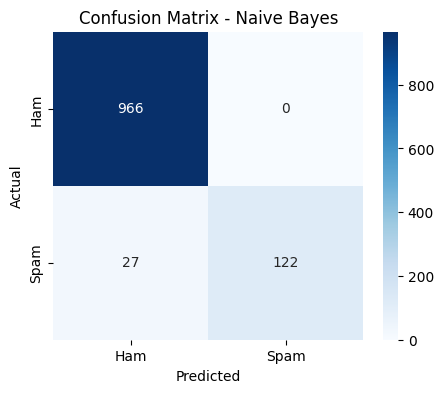

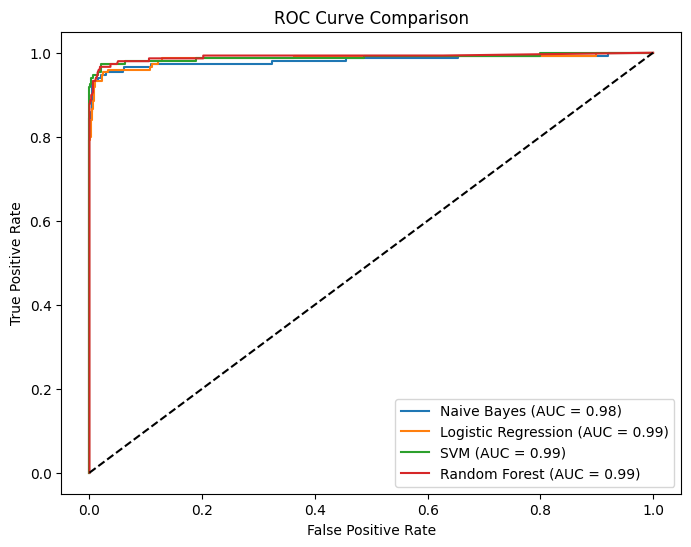

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# -----------------------------
# Confusion Matrix Heatmap
# -----------------------------
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example: plot for Naive Bayes
y_pred_nb = nb_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# -----------------------------
# ROC Curve
# -----------------------------
def plot_roc(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:,1]
        else:
            # For models like LinearSVC that don't support predict_proba
            y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0,1],[0,1],'k--')  # diagonal line
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Compare all models
models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "Random Forest": rf_model
}

plot_roc(models, X_test, y_test)
